# Database

In [1]:
!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from category_encoders.cat_boost import CatBoostEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Federal-road-accidents---Brazil/main/2%20-%20Statistic/Federal_Accidents_Statistic.csv', sep = ',', encoding='ISO-8859-1')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,ano,mes,dia,ano_mes,horas,minutos,regiao,obitos
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,br-116,453.0,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Amanhecer,Crescente,Nublado,Dupla,Rural,1,0,1,0,0,0,1,1,-24.561681,-47.867522,SPRF-SP,DEL05-SP,UOP01-DEL05-SP,2021,1,1,2021-01,5,30,Sudeste,0
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,br-174,937.0,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Rural,6,0,1,0,5,0,1,4,-2.508068,-60.036434,SPRF-AM,DEL01-AM,UOP01-DEL01-AM,2021,1,1,2021-01,8,5,Norte,0
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,br-222,128.5,ITAPAJE,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Rural,3,0,2,0,0,1,2,2,-3.707626,-39.623509,SPRF-CE,DEL04-CE,UOP03-DEL04-CE,2021,1,1,2021-01,10,10,Nordeste,0
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,br-493,18.0,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Urbano,2,0,1,0,1,0,1,2,-22.668712,-43.018627,SPRF-RJ,DEL02-RJ,UOP04-DEL02-RJ,2021,1,1,2021-01,12,30,Sudeste,0
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,br-393,252.0,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Nublado,Simples,Rural,3,0,1,1,1,0,2,2,-22.434220,-43.775615,SPRF-RJ,DEL05-RJ,UOP02-DEL05-RJ,2021,1,1,2021-01,14,40,Sudeste,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184550 entries, 0 to 184549
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      184550 non-null  float64
 1   data_inversa            184550 non-null  object 
 2   dia_semana              184550 non-null  object 
 3   horario                 184550 non-null  object 
 4   uf                      184550 non-null  object 
 5   br                      184550 non-null  object 
 6   km                      184550 non-null  float64
 7   municipio               184550 non-null  object 
 8   causa_acidente          184550 non-null  object 
 9   tipo_acidente           184550 non-null  object 
 10  classificacao_acidente  184550 non-null  object 
 11  fase_dia                184550 non-null  object 
 12  sentido_via             184550 non-null  object 
 13  condicao_metereologica  184550 non-null  object 
 14  tipo_pista          

# Treino e teste


Algumas variaveis precisam ser removidas, pois não tem logica para serem considerados no modelo, são elas:

* id: Identificação da ocorrencia não é necessario e nem deve ser utilizado para features;
* data_inversa: Já existem 3 campos derivados;
* horario: Ambiguo com os campos hora e minutos;
* classificacao_acidente: A ídeia é estimar das ocorrencias quais podem levar a a fatalidade, utilizar uma variavel que uma de susas caractegorias já dizem isso, seria redundante;
* feridos: Feature é apenas a somatoria dos feridos_leves e feridos_graves;
* mortos: Ambiguo com a target;
* regional: Mesma função de uf;
* uop: Mesma função de delegacia;
* latitude e longitude: Existem diversos outros campos para localidade tais como uf, região, municipio e br;




In [6]:
X = df.drop(['id','data_inversa','horario','classificacao_acidente','feridos','mortos','regional','uop','ano_mes','obitos','latitude','longitude'], axis = 1)
y = df['obitos']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1337, stratify = y)

# Pré-Processamento dos dados

As features uf, br, municipio e causa_acidente possuem muitas categorias e transformalas via one-hot ou get_dummies aumentaria demais o número de colunas.



In [8]:
features_cat = ['dia_semana','uf','br','municipio','causa_acidente','tipo_acidente','fase_dia','sentido_via','condicao_metereologica','tipo_pista','uso_solo','delegacia','regiao']
features_num = ['km','pessoas','feridos_leves','feridos_graves','ilesos','ignorados','veiculos','ano','mes','dia','horas','minutos']

In [9]:
# Variaveis Categoricas
encoder = CatBoostEncoder(cols = features_cat)
x_train_encoder = encoder.fit_transform(x_train,y_train)

In [10]:
# Variaveis Númericas
scaler = StandardScaler()
x_train_encoder[features_num] = scaler.fit_transform(x_train_encoder[features_num])

x_train_encoder.head()

,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,uso_solo,pessoas,feridos_leves,feridos_graves,ilesos,ignorados,veiculos,delegacia,ano,mes,dia,horas,minutos,regiao
140796,0.072243,0.072243,0.072243,-0.043891,0.072243,0.072243,0.072243,0.072243,0.072243,0.072243,0.072243,0.072243,0.293954,-0.793835,-0.451818,0.610771,-0.334977,1.847050,0.072243,1.300339,0.808827,-0.526396,1.488534,-0.532127,0.072243
48495,0.072243,0.072243,0.072243,-0.451870,0.072243,0.072243,0.072243,0.536122,0.536122,0.536122,0.072243,0.536122,-0.684358,-0.793835,-0.451818,-0.636591,1.731284,-0.909917,0.072243,-1.182679,0.506402,1.296117,1.652307,-1.391066,0.072243
18569,0.036122,0.536122,0.072243,-0.285575,0.072243,0.072243,0.072243,0.072243,0.357414,0.357414,0.036122,0.357414,-0.684358,-0.793835,-0.451818,-0.636591,1.731284,-0.909917,0.072243,-1.182679,-1.610572,-0.868117,0.669669,-0.245814,0.536122
63306,0.536122,0.072243,0.072243,-0.251872,0.072243,0.072243,0.072243,0.036122,0.268061,0.072243,0.536122,0.268061,-0.684358,0.134408,-0.451818,-0.636591,-0.334977,-0.909917,0.072243,-1.182679,1.716101,1.296117,-0.149196,-1.391066,0.036122
151922,0.024081,0.036122,0.036122,-1.086455,0.072243,0.072243,0.072243,0.024081,0.214449,0.072243,0.024081,0.072243,-0.684358,-0.793835,1.176677,-0.636591,-0.334977,-0.909917,0.072243,1.300339,-1.005722,-0.640303,-0.968061,0.326812,0.024081


In [11]:
# Base de Teste
x_test_encoder = encoder.transform(x_test)
x_test_encoder[features_num] = scaler.transform(x_test_encoder[features_num])

x_train_encoder.head()

,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,uso_solo,pessoas,feridos_leves,feridos_graves,ilesos,ignorados,veiculos,delegacia,ano,mes,dia,horas,minutos,regiao
140796,0.072243,0.072243,0.072243,-0.043891,0.072243,0.072243,0.072243,0.072243,0.072243,0.072243,0.072243,0.072243,0.293954,-0.793835,-0.451818,0.610771,-0.334977,1.847050,0.072243,1.300339,0.808827,-0.526396,1.488534,-0.532127,0.072243
48495,0.072243,0.072243,0.072243,-0.451870,0.072243,0.072243,0.072243,0.536122,0.536122,0.536122,0.072243,0.536122,-0.684358,-0.793835,-0.451818,-0.636591,1.731284,-0.909917,0.072243,-1.182679,0.506402,1.296117,1.652307,-1.391066,0.072243
18569,0.036122,0.536122,0.072243,-0.285575,0.072243,0.072243,0.072243,0.072243,0.357414,0.357414,0.036122,0.357414,-0.684358,-0.793835,-0.451818,-0.636591,1.731284,-0.909917,0.072243,-1.182679,-1.610572,-0.868117,0.669669,-0.245814,0.536122
63306,0.536122,0.072243,0.072243,-0.251872,0.072243,0.072243,0.072243,0.036122,0.268061,0.072243,0.536122,0.268061,-0.684358,0.134408,-0.451818,-0.636591,-0.334977,-0.909917,0.072243,-1.182679,1.716101,1.296117,-0.149196,-1.391066,0.036122
151922,0.024081,0.036122,0.036122,-1.086455,0.072243,0.072243,0.072243,0.024081,0.214449,0.072243,0.024081,0.072243,-0.684358,-0.793835,1.176677,-0.636591,-0.334977,-0.909917,0.072243,1.300339,-1.005722,-0.640303,-0.968061,0.326812,0.024081


In [12]:
train_encoder = pd.concat([x_train_encoder,y_train], axis = 1)
test_encoder = pd.concat([x_test_encoder,y_test], axis = 1)

# Gerar os arquivos a parte
train_encoder.to_csv('train_encoder.csv', index = False)
test_encoder.to_csv('test_encoder.csv', index = False)

In [13]:
print(f'Número de observações: {train_encoder.shape[0]}')
print(f'Número de variaveis: {train_encoder.shape[1]}')

Número de observações: 147640
Número de variaveis: 26


# Oversampling (SMOTE)

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
smote = SMOTE()

In [16]:
x_train_smote, y_train_smote = smote.fit_resample(x_train_encoder, y_train)

In [17]:
train_smote = pd.concat([x_train_smote,y_train_smote], axis = 1)

<Axes: xlabel='obitos', ylabel='count'>

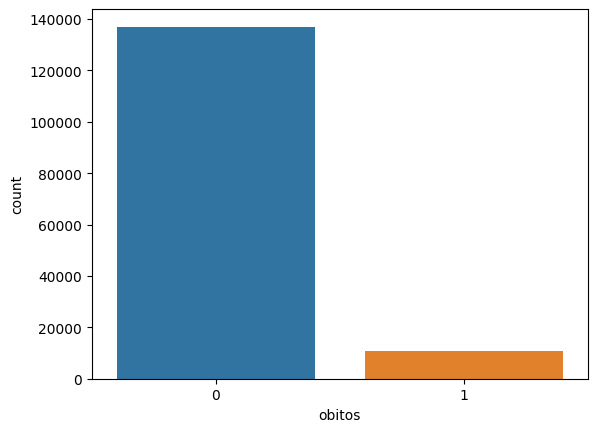

In [18]:
sns.countplot(data = pd.concat([x_train_encoder, y_train], axis = 1), x = 'obitos')

<Axes: xlabel='obitos', ylabel='count'>

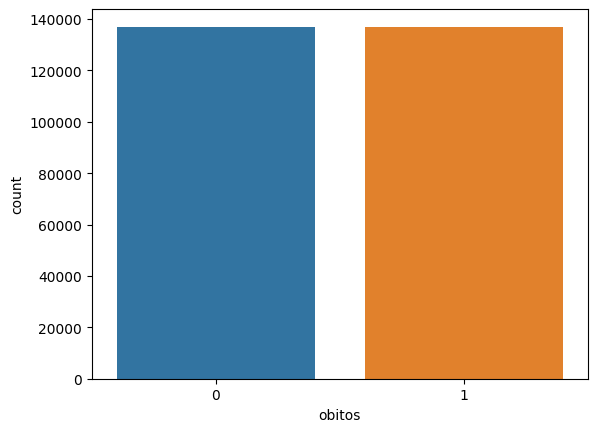

In [19]:
sns.countplot(data= pd.concat([x_train_smote,y_train_smote], axis = 1), x = 'obitos')

In [20]:
print(f'Número de observações: {train_smote.shape[0]}')
print(f'Número de variaveis: {train_smote.shape[1]}')

Número de observações: 273948
Número de variaveis: 26


In [21]:
train_smote.to_csv('train_smote.csv', index = False)
train_smote.head()

,dia_semana,uf,br,km,municipio,causa_acidente,tipo_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,uso_solo,pessoas,feridos_leves,feridos_graves,ilesos,ignorados,veiculos,delegacia,ano,mes,dia,horas,minutos,regiao,obitos
0,0.072243,0.072243,0.072243,-0.043891,0.072243,0.072243,0.072243,0.072243,0.072243,0.072243,0.072243,0.072243,0.293954,-0.793835,-0.451818,0.610771,-0.334977,1.847050,0.072243,1.300339,0.808827,-0.526396,1.488534,-0.532127,0.072243,1
1,0.072243,0.072243,0.072243,-0.451870,0.072243,0.072243,0.072243,0.536122,0.536122,0.536122,0.072243,0.536122,-0.684358,-0.793835,-0.451818,-0.636591,1.731284,-0.909917,0.072243,-1.182679,0.506402,1.296117,1.652307,-1.391066,0.072243,0
2,0.036122,0.536122,0.072243,-0.285575,0.072243,0.072243,0.072243,0.072243,0.357414,0.357414,0.036122,0.357414,-0.684358,-0.793835,-0.451818,-0.636591,1.731284,-0.909917,0.072243,-1.182679,-1.610572,-0.868117,0.669669,-0.245814,0.536122,0
3,0.536122,0.072243,0.072243,-0.251872,0.072243,0.072243,0.072243,0.036122,0.268061,0.072243,0.536122,0.268061,-0.684358,0.134408,-0.451818,-0.636591,-0.334977,-0.909917,0.072243,-1.182679,1.716101,1.296117,-0.149196,-1.391066,0.036122,0
4,0.024081,0.036122,0.036122,-1.086455,0.072243,0.072243,0.072243,0.024081,0.214449,0.072243,0.024081,0.072243,-0.684358,-0.793835,1.176677,-0.636591,-0.334977,-0.909917,0.072243,1.300339,-1.005722,-0.640303,-0.968061,0.326812,0.024081,0
